In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('SeranganJantung.xlsx')

In [3]:
df

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung
0,60.0,2.0,0.0,1.0,150.0,1.0,50.0,Yes
1,69.0,2.0,1.0,1.0,170.0,0.0,60.0,Yes
2,52.0,1.0,0.0,NaN,174.0,1.0,35.0,No
3,66.0,2.0,1.0,1.0,169.0,0.0,60.0,Yes
4,70.0,3.0,0.0,1.0,237.0,0.0,65.0,Yes
...,...,...,...,...,...,...,...,...
133,54.0,1.0,0.0,0.0,170.0,1.0,35.0,No
134,59.0,1.0,0.0,0.0,172.0,0.0,60.0,No
135,55.0,3.0,0.0,0.0,122.0,1.0,45.0,No
136,73.0,2.0,1.0,1.0,236.0,0.0,60.0,Yes


In [4]:
df.isna().sum()

Umur                            3
Status Pernikahan               2
Jenis Kelamin                   1
Kategori Berat Badan            2
Kolesterol                      3
Pelatihan Pengelolaan Stress    1
Tingkat Stress                  0
Serangan Jantung                0
dtype: int64

In [5]:
df = df.fillna(df.mean())

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [6]:
df.isna().sum()

Umur                            0
Status Pernikahan               0
Jenis Kelamin                   0
Kategori Berat Badan            0
Kolesterol                      0
Pelatihan Pengelolaan Stress    0
Tingkat Stress                  0
Serangan Jantung                0
dtype: int64

In [7]:
mean = df['Umur'].mean()
std = df['Umur'].std()
threshold = 3  # Ambil nilai 3 deviasi standar sebagai threshold
noise = df[df['Umur'].abs() > (mean + threshold * std)]
noise

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung
112,750.0,2.000000,1.0,2.0,143.0,1.0,80.0,Yes
122,730.0,1.698529,1.0,2.0,143.0,1.0,80.0,Yes


(0.0, 800.0)

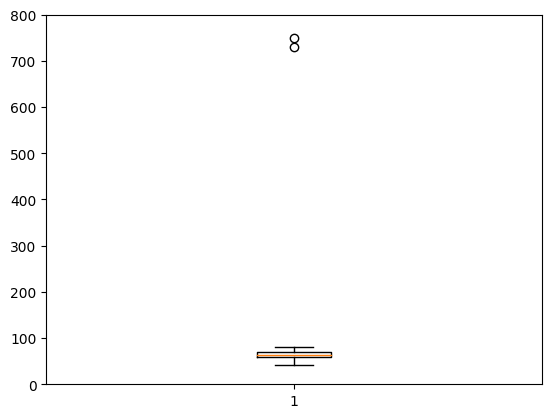

In [8]:
plt.boxplot(df["Umur"])
plt.ylim([0,800])

In [9]:
remove_noise1 = df.drop(df[df['Umur'].abs() > (mean + threshold * std)].index)
remove_noise1

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung
0,60.0,2.0,0.0,1.000000,150.0,1.0,50.0,Yes
1,69.0,2.0,1.0,1.000000,170.0,0.0,60.0,Yes
2,52.0,1.0,0.0,0.933824,174.0,1.0,35.0,No
3,66.0,2.0,1.0,1.000000,169.0,0.0,60.0,Yes
4,70.0,3.0,0.0,1.000000,237.0,0.0,65.0,Yes
...,...,...,...,...,...,...,...,...
133,54.0,1.0,0.0,0.000000,170.0,1.0,35.0,No
134,59.0,1.0,0.0,0.000000,172.0,0.0,60.0,No
135,55.0,3.0,0.0,0.000000,122.0,1.0,45.0,No
136,73.0,2.0,1.0,1.000000,236.0,0.0,60.0,Yes


In [10]:
mean = remove_noise1['Status Pernikahan'].mean()
std = remove_noise1['Status Pernikahan'].std()
threshold = 3  # Ambil nilai 3 deviasi standar sebagai threshold
noise = remove_noise1[remove_noise1['Status Pernikahan'].abs() > (mean + threshold * std)]
noise

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung


In [11]:
mean = remove_noise1['Jenis Kelamin'].mean()
std = remove_noise1['Jenis Kelamin'].std()
threshold = 3  # Ambil nilai 3 deviasi standar sebagai threshold
noise = remove_noise1[remove_noise1['Jenis Kelamin'].abs() > (mean + threshold * std)]
noise

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung


In [12]:
mean = remove_noise1['Kategori Berat Badan'].mean()
std = remove_noise1['Kategori Berat Badan'].std()
threshold = 3  # Ambil nilai 3 deviasi standar sebagai threshold
noise = remove_noise1[remove_noise1['Kategori Berat Badan'].abs() > (mean + threshold * std)]
noise

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung


In [13]:
mean = remove_noise1['Kolesterol'].mean()
std = remove_noise1['Kolesterol'].std()
threshold = 3  # Ambil nilai 3 deviasi standar sebagai threshold
noise = remove_noise1[remove_noise1['Kolesterol'].abs() > (mean + threshold * std)]
noise

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung
8,60.0,2.0,0.0,0.0,1430.0,0.0,45.0,No
128,61.0,2.0,0.0,1.0,1438.0,1.0,50.0,Yes


(0.0, 1500.0)

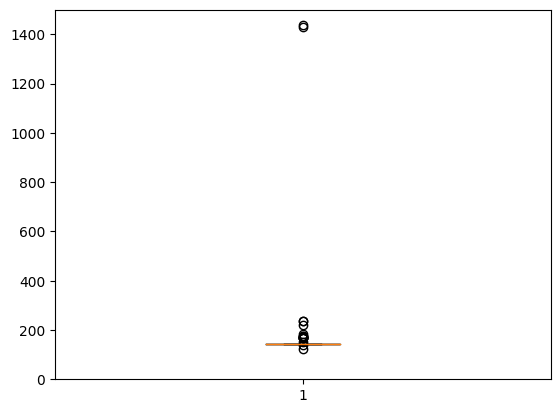

In [14]:
plt.boxplot(remove_noise1["Kolesterol"])
plt.ylim([0,1500])

In [15]:
remove_noise2 = remove_noise1.drop(remove_noise1[remove_noise1['Kolesterol'].abs() > (mean + threshold * std)].index)
remove_noise2

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung
0,60.0,2.0,0.0,1.000000,150.0,1.0,50.0,Yes
1,69.0,2.0,1.0,1.000000,170.0,0.0,60.0,Yes
2,52.0,1.0,0.0,0.933824,174.0,1.0,35.0,No
3,66.0,2.0,1.0,1.000000,169.0,0.0,60.0,Yes
4,70.0,3.0,0.0,1.000000,237.0,0.0,65.0,Yes
...,...,...,...,...,...,...,...,...
133,54.0,1.0,0.0,0.000000,170.0,1.0,35.0,No
134,59.0,1.0,0.0,0.000000,172.0,0.0,60.0,No
135,55.0,3.0,0.0,0.000000,122.0,1.0,45.0,No
136,73.0,2.0,1.0,1.000000,236.0,0.0,60.0,Yes


In [16]:
mean = remove_noise2['Pelatihan Pengelolaan Stress'].mean()
std = remove_noise2['Pelatihan Pengelolaan Stress'].std()
threshold = 3  # Ambil nilai 3 deviasi standar sebagai threshold
noise = remove_noise2[remove_noise2['Pelatihan Pengelolaan Stress'].abs() > (mean + threshold * std)]
noise

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung


In [17]:
mean = remove_noise2['Tingkat Stress'].mean()
std = remove_noise2['Tingkat Stress'].std()
threshold = 3  # Ambil nilai 3 deviasi standar sebagai threshold
noise = remove_noise2[remove_noise2['Tingkat Stress'].abs() > (mean + threshold * std)]
noise

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung
9,51.0,1.0,1.0,0.000000,143.0,1.0,400.0,No
137,62.0,3.0,0.0,0.933824,185.0,1.0,650.0,No


(0.0, 700.0)

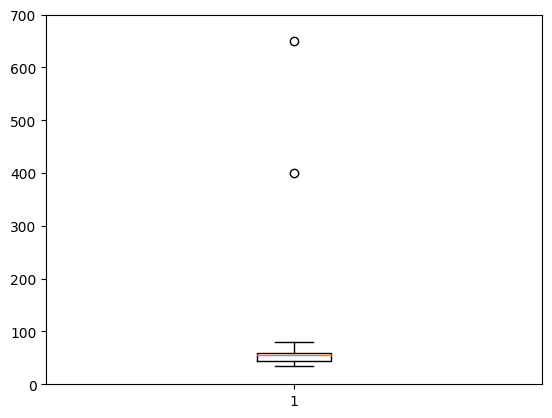

In [18]:
plt.boxplot(remove_noise2["Tingkat Stress"])
plt.ylim([0,700])

In [19]:
remove_noise3 = remove_noise2.drop(remove_noise2[remove_noise2['Tingkat Stress'].abs() > (mean + threshold * std)].index)
remove_noise3

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung
0,60.0,2.0,0.0,1.000000,150.0,1.0,50.0,Yes
1,69.0,2.0,1.0,1.000000,170.0,0.0,60.0,Yes
2,52.0,1.0,0.0,0.933824,174.0,1.0,35.0,No
3,66.0,2.0,1.0,1.000000,169.0,0.0,60.0,Yes
4,70.0,3.0,0.0,1.000000,237.0,0.0,65.0,Yes
...,...,...,...,...,...,...,...,...
132,80.0,3.0,1.0,1.000000,222.0,0.0,80.0,Yes
133,54.0,1.0,0.0,0.000000,170.0,1.0,35.0,No
134,59.0,1.0,0.0,0.000000,172.0,0.0,60.0,No
135,55.0,3.0,0.0,0.000000,122.0,1.0,45.0,No


In [20]:
remove_noise3.to_csv("SeranganJantungPreprocessing.csv")

In [21]:
remove_noise3.head(10)

,Umur,Status Pernikahan,Jenis Kelamin,Kategori Berat Badan,Kolesterol,Pelatihan Pengelolaan Stress,Tingkat Stress,Serangan Jantung
0,60.000000,2.0,0.0,1.000000,150.0,1.0,50.0,Yes
1,69.000000,2.0,1.0,1.000000,170.0,0.0,60.0,Yes
2,52.000000,1.0,0.0,0.933824,174.0,1.0,35.0,No
3,66.000000,2.0,1.0,1.000000,169.0,0.0,60.0,Yes
4,70.000000,3.0,0.0,1.000000,237.0,0.0,65.0,Yes
5,72.940741,1.0,0.0,0.000000,174.0,1.0,35.0,No
6,58.000000,2.0,1.0,0.000000,140.0,0.0,45.0,No
7,59.000000,2.0,1.0,0.000000,143.0,0.0,45.0,Yes
10,52.000000,1.0,0.0,0.000000,143.0,1.0,65.0,No
11,70.000000,2.0,1.0,1.000000,143.0,1.0,50.0,Yes


Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = remove_noise3.iloc[:, :-1].values
y = remove_noise3.iloc[:, -1].values

In [32]:
model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=10)

# Print results
print("Mean Accuracy: %.2f%%" % (scores.mean()*100.0))

Mean Accuracy: 96.26%


In [34]:
model.fit(X, y)

RandomForestClassifier()

In [35]:
import joblib
joblib.dump(model, 'rf_model.pkl')

['rf_model.pkl']

In [38]:
new_data = pd.read_excel('SeranganJantung-PelangganBaru.xlsx')

rf_model = joblib.load('rf_model.pkl')
predictions = rf_model.predict(new_data)

for i in range(len(predictions)):
    if predictions[i] == 0:
        print(f"Data ke-{i+1}: Tidak Sakit Jantung")
    else:
        print(f"Data ke-{i+1}: Sakit Jantung")

Data ke-1: Sakit Jantung
Data ke-2: Sakit Jantung
Data ke-3: Sakit Jantung
Data ke-4: Sakit Jantung
Data ke-5: Sakit Jantung
Data ke-6: Sakit Jantung
Data ke-7: Sakit Jantung
Data ke-8: Sakit Jantung
Data ke-9: Sakit Jantung
Data ke-10: Sakit Jantung


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

X = remove_noise3.iloc[:, :-1].values
y = remove_noise3.iloc[:, -1].values

In [40]:
model = KNeighborsClassifier()
scores = cross_val_score(model, X, y, cv=10)

# Print results
print("Mean Accuracy: %.2f%%" % (scores.mean()*100.0))

Mean Accuracy: 73.63%


In [41]:
model.fit(X, y)

KNeighborsClassifier()

In [42]:
joblib.dump(model, 'knn_model.pkl')

['knn_model.pkl']

In [43]:
knn_model = joblib.load('knn_model.pkl')
predictions = knn_model.predict(new_data)

for i in range(len(predictions)):
    if predictions[i] == 0:
        print(f"Data ke-{i+1}: Tidak Sakit Jantung")
    else:
        print(f"Data ke-{i+1}: Sakit Jantung")

Data ke-1: Sakit Jantung
Data ke-2: Sakit Jantung
Data ke-3: Sakit Jantung
Data ke-4: Sakit Jantung
Data ke-5: Sakit Jantung
Data ke-6: Sakit Jantung
Data ke-7: Sakit Jantung
Data ke-8: Sakit Jantung
Data ke-9: Sakit Jantung
Data ke-10: Sakit Jantung


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


SVM

In [44]:
from sklearn.svm import SVC

X = remove_noise3.iloc[:, :-1].values
y = remove_noise3.iloc[:, -1].values

In [45]:
model = SVC(kernel='linear')
scores = cross_val_score(model, X, y, cv=10)

# Print results
print("Mean Accuracy: %.2f%%" % (scores.mean()*100.0))

Mean Accuracy: 90.22%


In [46]:
model.fit(X, y)

SVC(kernel='linear')

In [47]:
joblib.dump(model, 'svm_model.pkl')

['svm_model.pkl']

In [48]:
svm_model = joblib.load('svm_model.pkl')
predictions = svm_model.predict(new_data)

for i in range(len(predictions)):
    if predictions[i] == 0:
        print(f"Data ke-{i+1}: Tidak Sakit Jantung")
    else:
        print(f"Data ke-{i+1}: Sakit Jantung")

Data ke-1: Sakit Jantung
Data ke-2: Sakit Jantung
Data ke-3: Sakit Jantung
Data ke-4: Sakit Jantung
Data ke-5: Sakit Jantung
Data ke-6: Sakit Jantung
Data ke-7: Sakit Jantung
Data ke-8: Sakit Jantung
Data ke-9: Sakit Jantung
Data ke-10: Sakit Jantung


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
